In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# sistem drugog reda sa realnim polovima
#W(s)=2/(s+1)(s+2), polovi su -1 i -2
nule=[]
polovi=[-1,-2]
pojacanje=[2]
# python konverzija u kontrolabilnu kanonicku formu
Ac, Bc, Cc, Dc = signal.zpk2ss(nule, polovi, pojacanje)
Ac, Bc, Cc, Dc

(array([[-3., -2.],
        [ 1.,  0.]]), array([[ 1.],
        [ 0.]]), array([[ 0.,  2.]]), array([[ 0.]]))

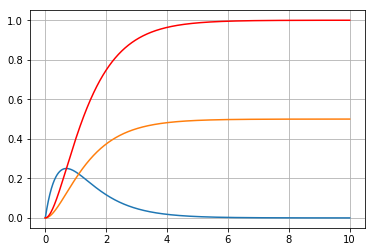

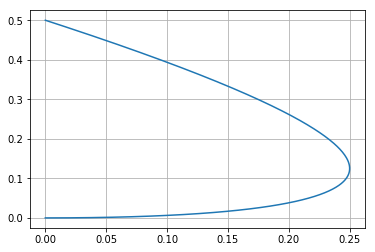

In [3]:
Wc=signal.lti(Ac, Bc, Cc, Dc)   

t=np.linspace(0,10,1000)
u=(t>=0)
tt,y,x=signal.lsim(Wc, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

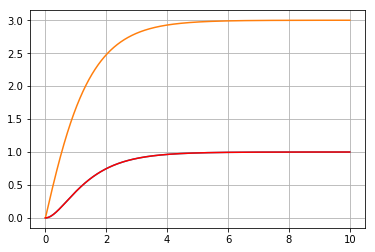

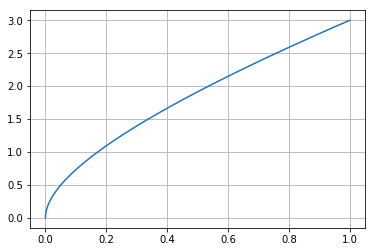

In [4]:
# opservabilna kanonicka forma:
Ao=np.matrix([[-3., 1],
        [ -2,  0.]])
Bo=np.matrix([[ 0],
        [ 2]])
Co=np.matrix([[ 1.,  0.]])
Do=np.matrix([[ 0.]])
Wo=signal.lti(Ao, Bo, Co,Do)

tt,y,x=signal.lsim(Wo, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

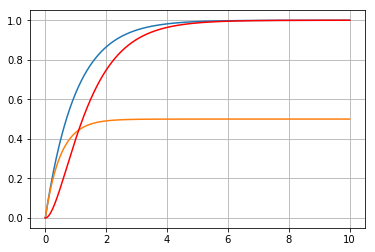

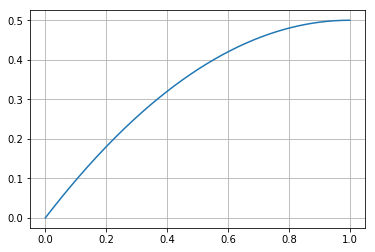

In [5]:
# dijagonalna kanonicka forma  W(s)=2(1/(s+1)-1/(s+2))
Ad=np.matrix([[-1., 0],
        [ 0,  -2]])
Bd=np.matrix([[ 1],
        [ 1]])
Cd=np.matrix([[ 2,  -2]])
Dd=np.matrix([[ 0.]])
Wd=signal.lti(Ad, Bd, Cd,Dd)

tt,y,x=signal.lsim(Wd, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

In [6]:
# transformacije stanja
# transformacija T iz opservabilne u kontrolabilnu kanonicku formu T=[[t1],[t2]]
CC=np.concatenate((Bo, Ao*Bo), axis=1)    # matrica kontrolabilnosti
t2=np.matrix([[0,1]])*CC**(-1)   # CC je invertibilna ako je sistem kontrolabilan
t1=t2*Ao
T=np.concatenate((t1, t2), axis=0) 
Acc=T*Ao*(T**(-1))
Bcc=T*Bo
Ccc=Co*T**(-1)
Acc,Bcc,Ccc

(matrix([[-3., -2.],
         [ 1.,  0.]]), matrix([[ 1.],
         [ 0.]]), matrix([[ 0.,  2.]]))

In [7]:
# transformacija iz kontrolabilne u opservabilnu kanonicku formu:
Ac=np.matrix(Ac)
Bc=np.matrix(Bc)
Cc=np.matrix(Cc)
Dc=np.matrix(Dc)
Ob=np.concatenate((Cc, Cc*Ac), axis=0)    # matrica opservabilnosti
t2=(Ob**(-1))*np.matrix([[0],[1]])   # Ob je invertibilna ako je sistem opservabilan
t1=Ac*t2
T=np.concatenate((t1, t2), axis=1) 
Aoo=(T**(-1))*Ac*T
Boo=(T**(-1))*Bc
Coo=Cc*T
Aoo,Boo,Coo

(matrix([[-3.,  1.],
         [-2.,  0.]]), matrix([[ 0.],
         [ 2.]]), matrix([[ 1.,  0.]]))

In [10]:
# transformacija u dijagonalnu formu:
# Kolone transformacione matrice T^(-1) su sopstveni vektori matrice sistema A
sv, Ti = np.linalg.eig(Ao)
T=Ti**(-1)
Add=T*Ao*(T**(-1))
Bdd=T*Bo
Cdd=Co*T**(-1)
Add,Bdd,Cdd

(matrix([[ -2.00000000e+00,  -4.44089210e-16],
         [  0.00000000e+00,  -1.00000000e+00]]), matrix([[ 2.82842712],
         [-4.47213595]]), matrix([[-0.70710678, -0.4472136 ]]))

In [11]:
# svodjenje na formu gde su elementi matrica B sve jedinice:
Cdd=np.matrix([[Cdd[0,0]*Bdd[0,0],Cdd[0,1]*Bdd[1,0]]])
Bdd=np.matrix([[1],[1]])
Cdd,Bdd               

(matrix([[-2.,  2.]]), matrix([[1],
         [1]]))

In [12]:
# Demonstracija da sve forme koje smo dobili daju istu funkciju prenosa:
#[nule, polovi,pojacanje]=signal.ss2zpk(A, B, C, D)
[brojilac_c, imenilac_c]=signal.ss2tf(Ac, Bc, Cc, Dc)
[brojilac_o, imenilac_o]=signal.ss2tf(Ao, Bo, Co, Do)
[brojilac_d, imenilac_d]=signal.ss2tf(Ad, Bd, Cd, Dd)
imenilac_c,imenilac_o,imenilac_d

(array([ 1.,  3.,  2.]), array([ 1.,  3.,  2.]), array([ 1.,  3.,  2.]))

In [13]:
brojilac_c,brojilac_o,brojilac_d

(array([[ 0.,  0.,  2.]]),
 array([[  0.00000000e+00,   4.44089210e-16,   2.00000000e+00]]),
 array([[  0.00000000e+00,   4.44089210e-16,   2.00000000e+00]]))

In [14]:
#2. Sistem drugog reda sa stabilnim konjugovano kompleksnim polovima
brojilac=[4]
imenilac=[1,2,4] #W(s)=4/(s^2+2s+4), omega_n=2,zeta=0.5
# python konverzija u kontrolabilnu kanonicku formu
Ac, Bc, Cc, Dc = signal.tf2ss(brojilac, imenilac)
Ac, Bc, Cc, Dc

(array([[-2., -4.],
        [ 1.,  0.]]), array([[ 1.],
        [ 0.]]), array([[ 0.,  4.]]), array([[ 0.]]))

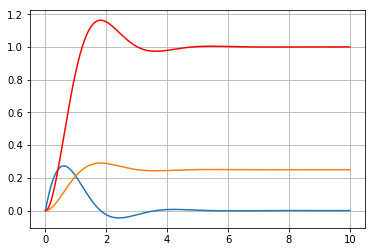

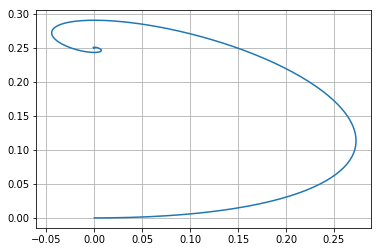

In [15]:
Wc=signal.lti(Ac, Bc, Cc, Dc)   

t=np.linspace(0,10,1000)
u=(t>=0)
tt,y,x=signal.lsim(Wc, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

In [16]:
# opservabilna kanonicka forma:
# transformacija iz kontrolabilne u opservabilnu kanonicku formu:
Ac=np.matrix(Ac)
Bc=np.matrix(Bc)
Cc=np.matrix(Cc)
Dc=np.matrix(Dc)
Ob=np.concatenate((Cc, Cc*Ac), axis=0)    # matrica opservabilnosti
t2=(Ob**(-1))*np.matrix([[0],[1]])   # Ob je invertibilna ako je sistem opservabilan
t1=Ac*t2
T=np.concatenate((t1, t2), axis=1) 
Ao=(T**(-1))*Ac*T
Bo=(T**(-1))*Bc
Co=Cc*T
Do=np.matrix(0)
Ao,Bo,Co

(matrix([[-2.,  1.],
         [-4.,  0.]]), matrix([[ 0.],
         [ 4.]]), matrix([[ 1.,  0.]]))

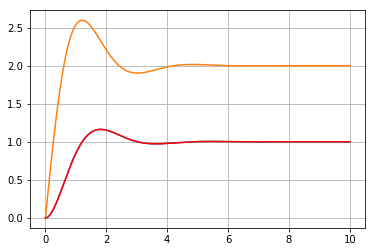

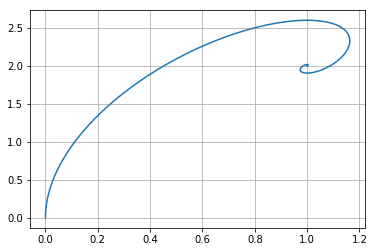

In [17]:
Wo=signal.lti(Ao, Bo, Co,Do)

tt,y,x=signal.lsim(Wo, u, t)

plt.plot(tt,x[:,0],tt,x[:,1],tt,y,'r')
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

In [18]:
# dijagonalna kanonicka forma je ista kao kontrolabilna kanonicka forma (sistem drugog reda, polovi kompleksni)

In [19]:
# 3. Sistem drugog reda sa polovima na imaginarnoj osi
brojilac=[1]
imenilac=[1,0,1] #W(s)=1/(s^2+1), polovi su j i -j
# python konverzija u kontrolabilnu kanonicku formu
Ac, Bc, Cc, Dc = signal.tf2ss(brojilac, imenilac)
Ac, Bc, Cc, Dc

(array([[-0., -1.],
        [ 1.,  0.]]), array([[ 1.],
        [ 0.]]), array([[ 0.,  1.]]), array([[ 0.]]))

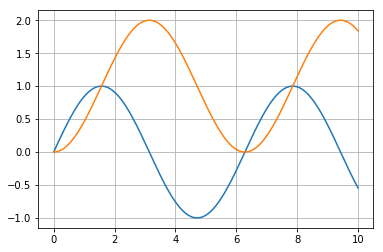

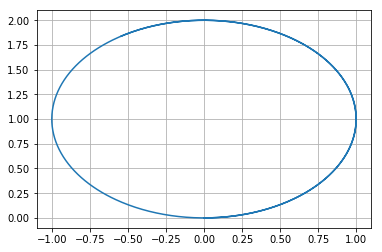

In [20]:
Wc=signal.lti(Ac, Bc, Cc, Dc)   

t=np.linspace(0,10,1000)
u=(t>=0)
tt,y,x=signal.lsim(Wc, u, t)

plt.plot(tt,x[:,0],tt,x[:,1])
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

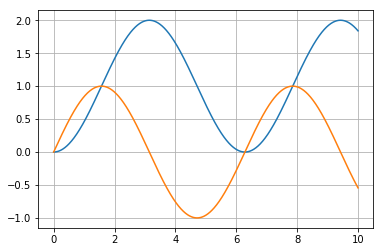

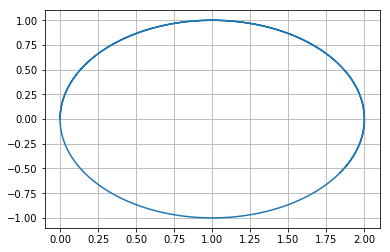

In [22]:
# opservabilna kanonicka forma:
Ao=np.matrix([[0., 1.], [-1., 0.]])
Bo=np.matrix([[0], [1]])
Co=np.matrix([[1,0]])
Do=np.matrix([[0]])
Wo=signal.lti(Ao, Bo, Co,Do)

tt,y,x=signal.lsim(Wo, u, t)

plt.plot(tt,x[:,0],tt,x[:,1])
plt.grid()
plt.show()

plt.plot(x[:,0],x[:,1])
plt.grid()
plt.show()

In [23]:
# dijagonalna kanonicka forma je ista kao kontrolabilna kanonicka forma (sistem drugog reda, polovi kompleksni)